## Divergence Free Vector fields

We want a random $\nabla \cdot \mathbf{u}_0 = 0$. How do we do this?

Simplest way: define another vector field $\mathbf{A} = G$, where $G$ is a draw from a gaussian random variable (or whatever), appropriately damped at the no-slip boundaries.

Then, we do 

$$\mathbf{u}_0 = \nabla \times \mathbf{A},$$

because we know $\nabla \cdot \nabla \times \mathbf{A} = $ for any vector field $\mathbf{A}$.

In [1]:
import dedalus.public as d3
import matplotlib.pyplot as plt
import numpy as np

2022-02-02 12:56:08,638 numexpr.utils 0/1 INFO :: NumExpr defaulting to 8 threads.


In [2]:
dtype = np.float64
dealias = 1#3/2
nx = 32
ny = 32
nz =32
Lx = 5
Ly = 5
Lz = 2

In [3]:
coords = d3.CartesianCoordinates('x', 'y', 'z')
dist = d3.Distributor(coords, dtype=dtype)
xbasis = d3.RealFourier(coords['x'], size=nx, bounds=(0, Lx), dealias = dealias)
ybasis = d3.RealFourier(coords['y'], size=ny, bounds=(0, Ly), dealias = dealias)
zbasis = d3.ChebyshevT(coords['z'], size=nz, bounds = (-1,1), dealias = dealias)
x = xbasis.local_grid(1)
y = xbasis.local_grid(1)
z = zbasis.local_grid(dealias)

In [4]:
# backgroupd shear flow
U = dist.VectorField(coords, name='U', bases=(xbasis,ybasis,zbasis))
U.set_scales(dealias)
U['g'][0] = z


In [5]:
ba = (xbasis,ybasis,zbasis)
u = dist.VectorField(coords, name='u', bases=ba)
A = dist.VectorField(coords, name='A', bases=ba)

In [6]:
A.fill_random('g', seed=42, distribution='normal')
A.low_pass_filter(scales=(0.5, 0.5, 0.5))
A['g'] *= Lz**2*(z+1)/Lz * (1 - (z+1)/Lz) # Damp noise at walls

up = d3.curl(A).evaluate()
#up.set_scales(1, keep_data=True)
#u.set_scales(dealias)
u['g'] = 1e-3*up['g'] + U['g']

In [7]:
divup = d3.div(up).evaluate()
divu = d3.div(u).evaluate()
divU = d3.div(U).evaluate()

In [8]:
u.set_scales(1, keep_data=True)

In [9]:
print("min, max divu = ({}, {})".format(divu['g'].min(), divu['g'].max()))
print("min, max divup = ({}, {})".format(divup['g'].min(), divup['g'].max()))
print("min, max divU = ({}, {})".format(divU['g'].min(), divU['g'].max()))

min, max divu = (-2.514571118070715e-15, 2.6945226262007818e-15)
min, max divup = (-1.5299914936919292e-12, 1.838568381345157e-12)
min, max divU = (0.0, 0.0)


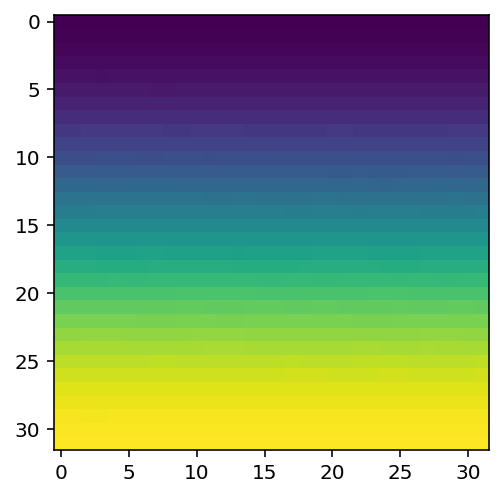

In [11]:
plt.imshow(u['g'][0,:,10,:].T)